# Predicting cab booking cancellation
## Capstone Project One : Springboard Data Science career track
### Notebook by Debisree Ray


## Introduction:

### 1. The Problem:

The business problem addressed here is to improve the customer service for Bangalore (India) based cab company called YourCabs. The problem is that a certain percentage of booking gets canceled by the company due to the unavailability of a car, and the cancellations occur at a time when the trip is about to start. Therefore it causes passengers inconvenience and a bad reputation for the company. So, the challenge is to build a predictive model, which would classify the upcoming bookings as, if they would eventually get cancelled due to car unavailability, or not. So this is a classification problem.


### 2. The Data: 

The Kaggle hosts the original problem and the dataset in their website as one of their competitions. Here, I downloaded the data from the Kaggle website. Following are the data fields in the dataset, which we are going to read in the Pandas data frame.


* id - booking ID<br />
* user_id - the ID of the customer (based on mobile number)<br />
* vehicle_model_id - vehicle model type.<br />
* package_id - type of package (1=4hrs & 40kms, 2=8hrs & 80kms, 3=6hrs & 60kms, 4= 10hrs & 100kms, 5=5hrs & 50kms, 6=3hrs & 30kms, 7=12hrs & 120kms)<br />
* travel_type_id - type of travel (1=long distance, 2= point to point, 3= hourly rental).<br />
* from_area_id - unique identifier of area. Applicable only for point-to-point travel and packages <br />
* to_area_id - unique identifier of area. Applicable only for point-to-point travel <br />
* from_city_id - unique identifier of city <br />
* to_city_id - unique identifier of city (only for intercity) <br />
* from_date - time stamp of requested trip start <br />
* to_date - time stamp of trip end <br />
* online_booking - if booking was done on desktop website <br />
* mobile_site_booking - if booking was done on mobile website <br />
* booking_created - time stamp of booking <br />
* from_lat - latitude of from area <br />
* from_long - longitude of from area <br />
* to_lat - latitude of to area <br />
* to_long - longitude of to area <br />
* Car_Cancellation (available only in training data) - whether the booking was cancelled (1) or not (0) due to unavailability of a car. <br />
* Cost_of_error (available only in training data) - the cost incurred if the booking is misclassified. The cost of misclassifying an uncancelled booking as a cancelled booking (cost=1 unit). The cost associated with misclassifying a cancelled booking as uncancelled, This cost is a function of how close the cancellation occurs relative to the trip start time. The closer the trip, the higher the cost. Cancellations occurring less than 15 minutes prior to the trip start incur a fixed penalty of 100 units. <br />



### 3. The questions of interest:

This data analysis and story-telling report is organized around the following questions of interest:

* How many unique users are out there? Are there any returning customers? Did they (returning customers) got their rides canceled?
* What are the different package IDs out there? Is there any relationship with the cancellations?
* What are the different travel types, vehicle IDs and mode of bookings (mobile/website/phone)? How are they related with the cancellations?
* Is there any connection between the drop-off location/city/area ID/latitude-longitude info and cancellations? What about the same with the pick-up locations/city/area IDs
* In which areas/neighborhoods, the cab service is the most popular?
* what is the busiest hour in a day? Does that have any connection with the cancellation?
* Which day of the week is the most popular in the cab users? Is there any connection between the day of the week with the cancellations?


### 4. Import the necessary libraries and the data:



To start, let's first import all the necessary modules and libraries and read the data set into the Pandas dataframe. These are some data wrangling and exploratory analysis from the previous part. For detailed EDA, see the following:

https://github.com/debisree/Springboard_Debisree/blob/master/predicting-cab-booking-cancellations-EDA.ipynb

https://github.com/debisree/Springboard_Debisree/blob/master/predicting-cab-booking-cancellations-milestone.ipynb

In [2]:
#os.getcwd()
#os.chdir ('Springboard_Debisree/predicting-cab-booking-cancellations/')

import os
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Kaggle_YourCabs_training.csv')
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [156]:
#convert from_date column, to_date column and booking_created column to date-time
#Note: when we try to convert NaN to date-time, it gets converted to NaT(Not a timestamp)


df['from_date'] = pd.to_datetime(df['from_date'])
df['to_date'] = pd.to_datetime(df['to_date'])
df['booking_created'] = pd.to_datetime(df['booking_created'])
#df.head()

In [157]:
## Let's split the dataframe in another group (for which the car_cancellation =1):

df1 = df[df['Car_Cancellation'] > 0]
#df1.head()
#df1.info()

So, df1 is another dataframe for the canceled ('Car_cancellation' = 1) bookings. Total no of entries are 3132.


In [219]:
#Booking time:

time=df.booking_created.value_counts()
t=df.booking_created
t_can=df1.booking_created
time_can= df1.booking_created.value_counts()
#print(time_can)

max=time.values.max()
min=time.values.min()



#t=time.loc[time.values == max]

#print('Maximum booking created at a given timestamp:'+ str(max))
#print('And the corresponding date-time is: 2013-10-31 10:30:00')
#print('Minimum booking created at a given timestamp:'+str(min))

import datetime

df['booking_dayofweek'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.dayofweek
df['booking_date'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.day
df['booking_month'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.month
df['booking_time'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.time

df['booking_hour'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.hour
df['booking_min'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.minute
df['booking_min_to_h']= df['booking_min']/60
df['booking_time_new']= df['booking_hour']+df['booking_min_to_h']

df1['booking_dayofweek_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.dayofweek
df1['booking_date_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.day
df1['booking_month_can'] = pd.to_datetime(df['booking_created'],errors= 'coerce').dt.month
df1['booking_time_can'] = pd.to_datetime(df['booking_created'],errors ='coerce').dt.time


booking_dayofweek=df.booking_dayofweek.value_counts()
booking_date=df.booking_date.value_counts()
booking_m=df.booking_month.value_counts()
booking_t=df.booking_time.value_counts()

booking_dayofweek_can=df1.booking_dayofweek_can.value_counts()
booking_date_can=df1.booking_date_can.value_counts()
booking_m_can=df1.booking_month_can.value_counts()
booking_t_can=df1.booking_time_can.value_counts()

#df['booking_time_new']

In [7]:
date=df.from_date.value_counts()
date_can=df1.from_date.value_counts()
#print(date_can)
d=df.from_date
d_can=df1.from_date
max_d=date.values.max()
min_d=date.values.min()

In [178]:
#Splitting the trip starting time info into two seperate columns, date and time:
#To see if that has any connection with the cancellations:

#pd.__version__
import datetime

df['dayofweek'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.dayofweek
df['date'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.day
df['month'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.month
df['hour'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.hour
df['min'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.minute
df['min_to_h']= df['min']/60
df['time_new']= df['hour']+df['min_to_h']

df1['dayofweek_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.dayofweek
df1['date_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.day
df1['month_can'] = pd.to_datetime(df['from_date'],errors= 'coerce').dt.month
df1['time_can'] = pd.to_datetime(df['from_date'],errors ='coerce').dt.time


weekday=df.dayofweek.value_counts()
date=df.date.value_counts()
month=df.month.value_counts()
t=df.time.value_counts()

weekday_can=df1.dayofweek_can.value_counts()
date_can=df1.date_can.value_counts()
month_can=df1.month_can.value_counts()
t_can=df1.time_can.value_counts()
#print(month_can)


In [9]:
#Inspect if the time difference between the time of 
#booking and the time of trip strat has any impact on the cancellation:


import datetime as dt
end= df['from_date']
start=df['booking_created']
diff = (end - start) 
df['time_difference']= diff/np.timedelta64(1,'h')
#print(difference)

end_can= df1['from_date']
start_can=df1['booking_created']
diff_can = (end_can - start_can) 
df1['time_difference_can']= diff_can/np.timedelta64(1,'h')
#print(difference)


td=df.time_difference.value_counts()

td_can=df1.time_difference_can.value_counts()

### Some problem in the dataset:

We can see that in 42 entries of the dataset, the time difference (which is the difference in the datetime entries of ride booking and the actual trip start) is negative! This is unphysical, where you cannot book the ride, which has already initiated. Surprisingly, 41 of them are successful (not canceled.) 

We dropped these entries.



In [220]:
# Numerical values of the time difference:

#average time difference:
m0=np.mean(df['time_difference'])
#print(m0)
df_n = df[df['time_difference'] < 0]

df_new= df.drop(df[df['time_difference'] < 0].index)

In [221]:
df_new.columns

Index(['id', 'user_id', 'vehicle_model_id', 'package_id', 'travel_type_id',
       'from_area_id', 'to_area_id', 'from_city_id', 'to_city_id', 'from_date',
       'to_date', 'online_booking', 'mobile_site_booking', 'booking_created',
       'from_lat', 'from_long', 'to_lat', 'to_long', 'Car_Cancellation',
       'Cost_of_error', 'booking_dayofweek', 'booking_date', 'booking_month',
       'booking_time', 'dayofweek', 'date', 'month', 'time', 'time_difference',
       'hour', 'min', 'min_to_h', 'time_new', 'sec', 'booking_hour',
       'booking_min', 'booking_min_to_h', 'booking_time_new'],
      dtype='object')

### 5. Data preperation and the feature selection:

'df_new' is the final dataframe, to be used in the analysis. And the following features will be considered:

These are the features, directly taken from the data set. The descriptions for each of them can be found above.

* **vehicle_model_id**  
* **package_id**
* **travel_type_id**
* **from_area_id**
* **to_area_id**
* **from_city_id**
* **to_city_id**
* **online_booking**
* **mobile_site_booking**

These following features are engineered, from any given data column.

* **booking_date**:  Date of the booking timestamp of the ride.
* **booking_month**: Month of the booking timestamp of the ride.
* **booking_time_new**:  Hour (of a day) of the booking timestamp of the ride.
* **dayofweek**:  Day of the week of the actual trip.
* **date**:  Date of the timestamp of the actual ride.
* **month**:  Month of the timestamp of the actual ride.
* **time_new**:   Hour (of a day) of the timestamp of the actual ride.
* **time_difference**:  Difference (in hours) between the booking time and the actual trip start time.

In [222]:
features_cols = ['vehicle_model_id','package_id','travel_type_id','from_area_id','to_area_id','from_city_id', 'to_city_id',
'online_booking', 'mobile_site_booking','booking_dayofweek', 'booking_date', 'booking_month', 'booking_time_new','dayofweek', 'date', 'month',
                 'time_new','time_difference']

features = df_new[features_cols]
#cat_df = X_df['package_id','from_area_id','to_area_id']
#features = cont_df.join(pd.get_dummies(cat_df))
y = df_new.Car_Cancellation

In [223]:
# missing values:

features.from_area_id.fillna(0, inplace=True)
features.to_area_id.fillna(0, inplace=True)
features.package_id.fillna(0,inplace=True)
features.from_city_id.fillna(0, inplace=True)
features.to_city_id.fillna(0,inplace=True)

In [224]:
#features
X= features

### 6. Applying the Machine Learning models:

This is a classification problem, in supervised learning. Here we have used the following classification models:
* Logistic Regression 
* K-Nearest Neighbor (KNN)
* Support vector machine (SVM)
* Random Forest 
* Naive Bayes
* Gradient Boost

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

In [225]:
#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.learning_curve import validation_curve

# Splitting the dataset into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling:

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

### 6.a Logistic Regression:



In [226]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table   

,C_parameter,Accuracy
0,0.001,0.928478
1,0.010,0.928248
2,0.100,0.928094
3,1.000,0.928094
4,10.000,0.928248
5,100.000,0.928248


In [227]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[12080     6]
 [  928     3]]
0.9282476761158485


In [228]:
from sklearn.cross_validation import cross_val_score

cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.78943132 0.78229254 0.76142779 0.76787184 0.75572224]
Mean cross validation test score: 0.7713491446588524
Mean cross validation train score: 0.7728940822680628
Standard deviation in cv test scores: 0.012660553233844253


### 6.b K-Nearest neighbor (KNN) :


In [229]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)
#knn_disp= plot_roc_curve(knn,X_test,y_test)

[[12069    17]
 [  882    49]]
0.9309364676960897


In [230]:
from sklearn.cross_validation import cross_val_score

cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.78680617 0.77192245 0.7689084  0.77647355 0.76883278]
Mean cross validation test score: 0.7745886692939472
Mean cross validation train score: 0.8124290944460808
Standard deviation in cv scores: 0.006713041264411616


### 6.c Support Vector Machine (SVM):

In [231]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)

[[12086     0]
 [  931     0]]
0.9284781439655835


In [232]:
from sklearn.cross_validation import cross_val_score

cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.66514068 0.46468563 0.48233392 0.43005859 0.67839141]
Mean cross validation test score: 0.5441220448673978
Mean cross validation train score: 0.5213606866479686
Standard deviation in cv scores: 0.10565241272920518


### 6.d Random Forest:


In [233]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[11997    89]
 [  676   255]]
0.9412306983175847


In [234]:
from sklearn.cross_validation import cross_val_score

cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.84958843 0.85997927 0.82857759 0.85483092 0.84116874]
Mean cross validation test score: 0.8468289898790488
Mean cross validation train score: 0.8904182917936019
Standard deviation in cv scores: 0.011042890982563917


### 6.e Gradient Boosting :

In [235]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[11929   157]
 [  610   321]]
0.941077053084428


In [236]:
from sklearn.cross_validation import cross_val_score

cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.88229765 0.87431322 0.866321   0.8665768  0.862217  ]
Mean cross validation test score: 0.8703451345597936
Mean cross validation train score: 0.9081218189102914
Standard deviation in cv scores: 0.007142393504220632


### 6.f Naive Bayes:

In [237]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)

[[10647  1439]
 [  574   357]]
0.8453560728278405


In [238]:
from sklearn.cross_validation import cross_val_score

cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.73803868 0.73374529 0.72153563 0.70863863 0.6904031 ]
Mean cross validation test score: 0.7184722673466621
Mean cross validation train score: 0.7228986041001997
Standard deviation in cv scores: 0.01737856418854887


### 7.Comparison of the models:

We applied different ML models above and evaluated their performances in terms of **ROC-AUC score** for both the training and test data. Here we have tabulated the scores and plotted them. 

Clearly, the **Gradient Boost**, and the **Random Forest** are the two best performing models. Both of the models are ensembled, based on decision trees. 

So, we will perform a grid search/ hyperparameter tuning for those two ML models.


In [239]:
myLabels = [ 'Logistic Regression','KNN','SVM','Random Forest','Gradient Boost', 'Naive Bayes']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.928248
1                  KNN              0.930936
2                  SVM              0.928478
3        Random Forest              0.941231
4       Gradient Boost              0.941077
5          Naive Bayes              0.845356


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.772894,0.771349
1,KNN,0.812429,0.774589
2,SVM,0.521361,0.544122
3,Random Forest,0.890418,0.846829
4,Gradient Boost,0.908122,0.870345
5,Naive Bayes,0.722899,0.718472


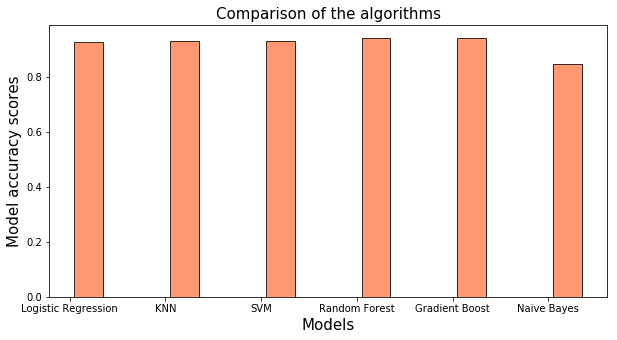

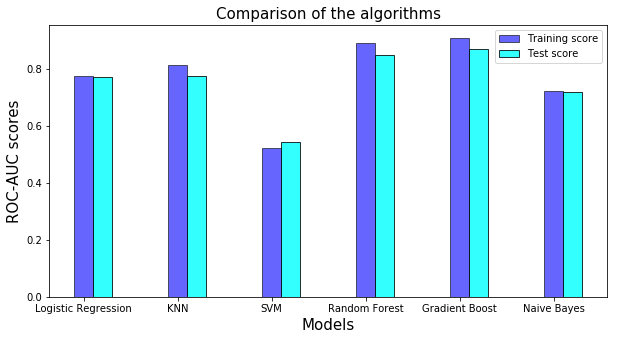

In [240]:
#plotting the accuracy scores:


index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6], myLabels)
#plt.legend()
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], myLabels)
plt.legend()
plt.show()

### 8. Applying Grid search CV for hyperparameter Tuning:
### 8.a Parameter Tuning for Random Forest:

In [241]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='auto',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10,12,16], "n_estimators": [50, 100,400,700,1000]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

print(gs.best_estimator_) 
print(gs.best_score_)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
0.9403397866455946


###  Fitting the Random forest model with the optimal hyperparameters:


In [242]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
y_predictions = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print(acc)
print(cv)

0.9400015364523315
0.8624473485440273


               Features  Importance scores
0      vehicle_model_id           0.001862
1            package_id           0.005566
2        travel_type_id           0.007315
3          from_area_id           0.009238
4            to_area_id           0.016076
5          from_city_id           0.026460
6            to_city_id           0.037811
7        online_booking           0.039495
8   mobile_site_booking           0.043273
9     booking_dayofweek           0.053249
10         booking_date           0.060430
11        booking_month           0.073354
12     booking_time_new           0.073827
13            dayofweek           0.091992
14                 date           0.100380
15                month           0.101435
16             time_new           0.104962
17      time_difference           0.153273


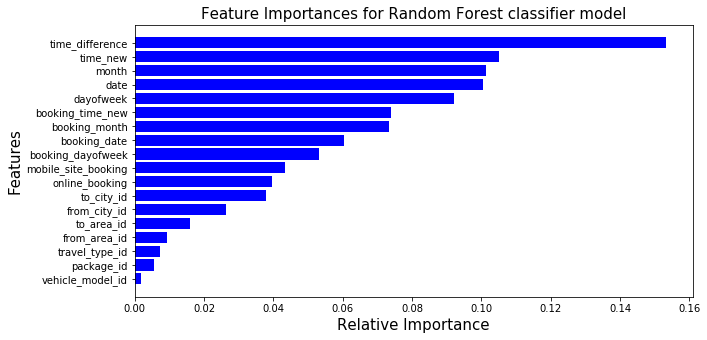

In [257]:
#Feature importances:

features = X
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#Visual comparison:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
_=plt.barh(index,imp, align='center',color='b')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Random Forest classifier model',fontsize=15)
plt.show()
#len(importances)

### ROC-AUC Score and the ROC curve:

In [244]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores = rf.predict_proba(X_test)
y_scores = y_scores[:,1]
auroc = roc_auc_score(y_test, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.8860217314758018


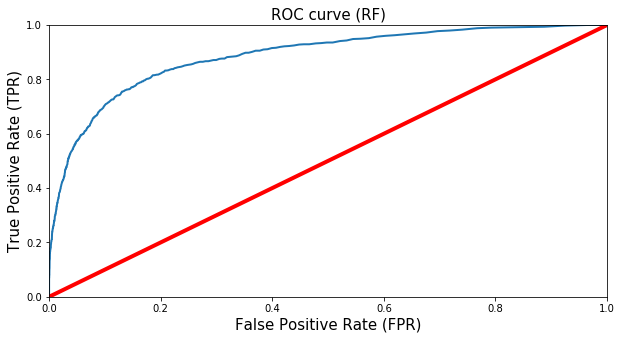

In [245]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### 8.b Parameter Tuning for Gradient Boost:

In [246]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["deviance"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  6.1min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
0.9431384169629923


### Fitting the Gradient Boost model with the optimal hyperparameters:

In [247]:
GB= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

0.9411538757010064
0.8705346309120516


               Features  Importance scores
0      vehicle_model_id           0.000894
1            package_id           0.001655
2        travel_type_id           0.007086
3          from_area_id           0.007563
4            to_area_id           0.008483
5          from_city_id           0.019984
6            to_city_id           0.022589
7        online_booking           0.035697
8   mobile_site_booking           0.040373
9     booking_dayofweek           0.048647
10         booking_date           0.056868
11        booking_month           0.068423
12     booking_time_new           0.068687
13            dayofweek           0.104127
14                 date           0.117486
15                month           0.121606
16             time_new           0.129774
17      time_difference           0.140058


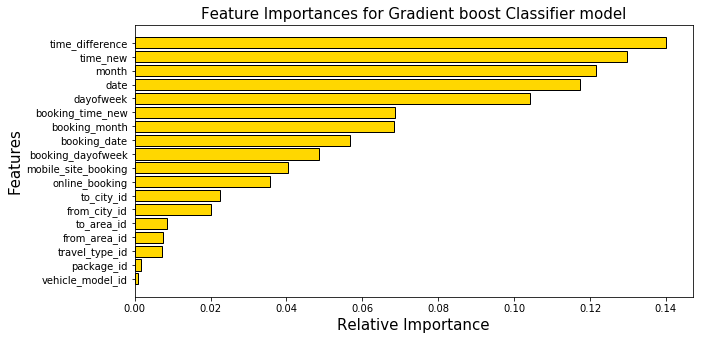

In [248]:
features = X
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

#visually:
plt.figure(figsize=(10,5))
#indices = np.argsort(importances)
index = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
_=plt.barh(index,imp, align='center',color='gold',edgecolor='k')
plt.xlabel('Relative Importance',fontsize=15)
plt.ylabel('Features',fontsize=15)
plt.yticks(index, features)
plt.title('Feature Importances for Gradient boost Classifier model',fontsize=15)
plt.show()
#len(importances)

### ROC-AUC Score and the ROC curve:

In [250]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores = GB.predict_proba(X_test)
y_scores = y_scores[:,1]
auroc = roc_auc_score(y_test, y_scores)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.8987293089109146


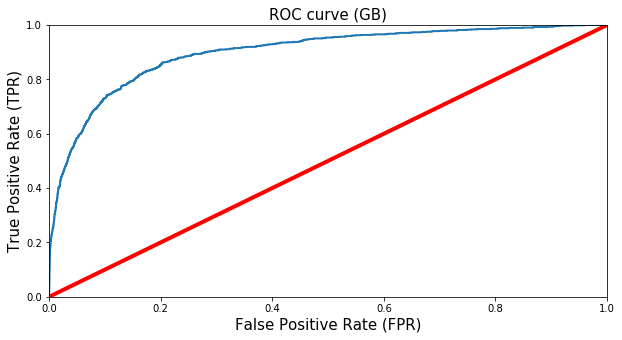

In [251]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

### 9. Conclusion:

* In order to predict the cab booking cancellations, here we have considered a bunch of (17) features, either directly from the dataset or engineered/derived from the data. Interestingly, the engineeered features are the most important ones in terms of relative importances.

* This is a classification problem. Here we have used the following classification models:
  * Logistic Regression
  * K-Nearest Neighbor (KNN)
  * Support vector machine (SVM)
  * Random Forest
  * Naive Bayes
  * Gradient Boost

* Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. Inorder to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

* We have evaluated each models in terms of model accuracy score, and 'ROC-AUC' score for both the training and test data, and plotted them. The two best performing models are the Random forest and the Gradient boost. Both are the ensemble model, based on decision trees.

* Next, we have carried out the grid search CV for the hyperparameter tuning for both the models seperately. This step was the most time consuming one in terms of computation. (The RF model took much longer time). With the result of the optimized hyperparameters, we have again fitted the two models, and got the predictions seperately.

* We have evaluated the ROC-AUC scores with the optimized hyperparameters. Clearly, the model performance improved with the optimized parameters. The final ROC-AUC scores fro both RF and the GB are 0.886 and 0.899

### 10.Future direction:

There is enough room to improve the model.

* Here we have used only the data of one year. The model can be improved, if we can use the data from another year.

* Use ensembles of the machine learning models to average out bias and improve performance.

* Try to use more feature engineering. Especially, here we have neglected the Latitude/longitude (GPS data) info. We could have etracted the route information out of them, and use that as a feature. 

* Try to fit and predict using the Extreme Gradient boost classifier model.
